<a href="https://colab.research.google.com/github/MrLuciferM/machine_learning_with_tensorflow_google.dev/blob/master/firstcomputervisionmodel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing tensorflow

In [85]:
import tensorflow as tf
print(tf.__version__)

2.2.0


Downloading dataset from keras API

In [86]:
mnist = tf.keras.datasets.fashion_mnist

Loading Dataset into training and test sets of images and labels

In [87]:
(training_images, training_labels), (test_images, test_labels) = mnist.load_data()

Importing matplotlib to view the image

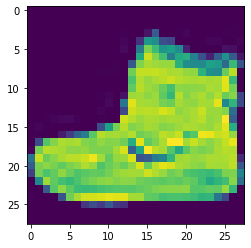

In [88]:
import matplotlib.pyplot as plt

plt.imshow(training_images[0])

| Label | Description |
|-------|-------------|
| 0     | T-shirt/top |
| 1     | Trouser     |
| 2     | Pullover    |
| 3     | Dress       |
| 4     | Coat        |
| 5     | Sandal      |
| 6     | Shirt       |
| 7     | Sneaker     |
| 8     | Bag         |
| 9     | Ankle boot  |

In [89]:
print(training_labels[0])
print(training_images[0])

9
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0
    0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62
   54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134
  144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178
  107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216
  216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1   1   0 200 232 

Normalizing the values of image to lie between 0 and 1

In [90]:
training_images = training_images/225.0
test_images = test_images/225.0

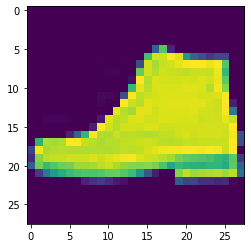

In [91]:
plt.imshow(training_images[42])

In [92]:
print(training_images[42])

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

### **Creating the model neural network**

* **Sequential** defines a sequence of layers in the neural network.

* **Flatten** takes a square and turns it into a one-dimensional vector.

* **Dense** adds a layer of neurons.

* **Activation** functions tell each layer of neurons what to do. There are lots of options, but use these for now:

* **Relu** effectively means that if X is greater than 0 return X, else return 0. It only passes values of 0 or greater to the next layer in the network.

* **Softmax** takes a set of values, and effectively picks the biggest one. For example, if the output of the last layer looks like [0.1, 0.1, 0.05, 0.1, 9.5, 0.1, 0.05, 0.05, 0.05], then it saves you from having to sort for the largest value—it returns [0,0,0,0,1,0,0,0,0].




In [93]:
model = tf.keras.models.Sequential([tf.keras.layers.Flatten(),
                                    tf.keras.layers.Dense(128, activation=tf.nn.relu),
                                    tf.keras.layers.Dense(10, activation=tf.nn.softmax)])

Compiling the model by adding an optimizer, loss and metrics and then fitting the model with training data

In [94]:
model.compile(optimizer= tf.keras.optimizers.Adam(),
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(training_images, training_labels, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4931 - accuracy: 0.8249
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3720 - accuracy: 0.8644
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3362 - accuracy: 0.8765
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3114 - accuracy: 0.8857
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2955 - accuracy: 0.8909


* Evaluating the accuracy of the model with the test sets
* we can see the accuracy of the model on the test set is lesser than that on training set

In [95]:
model.evaluate(test_images, test_labels)

313/313 [==============================] - 0s 1ms/step - loss: 0.3678 - accuracy: 0.8704


[0.36782532930374146, 0.8704000115394592]

It creates a set of classifications for each of the test images, then prints the first entry in the classifications.

In [96]:
classifications = model.predict(test_images)
print(classifications[0])

[2.2453035e-07 3.5184843e-08 5.5862710e-09 9.0495256e-10 5.2198441e-09
 2.8615964e-03 3.6383403e-07 1.8894456e-02 1.9008171e-06 9.7824144e-01]


In [97]:
print(test_labels[0])

9


Because softmax the sum of each row in classifications is equal to 1 (almost)

In [98]:
print(sum(classifications[0]))

1.000000032449483


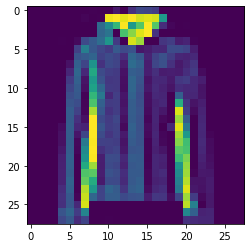

In [99]:
plt.imshow(test_images[6])

In the classifications[6] array the highest value is at index 4 that means it is most likely to be a coat

In [100]:
classifications[6]

array([7.4209551e-05, 3.3430576e-06, 1.1968726e-02, 1.1427534e-04,
       9.5187694e-01, 2.9555170e-07, 3.5931684e-02, 1.3932482e-10,
       3.0557803e-05, 4.2416239e-09], dtype=float32)

Trying the model with different values (number of neurons) for dense layer

In [101]:
model1 = tf.keras.models.Sequential([tf.keras.layers.Flatten(),
                                    tf.keras.layers.Dense(512, activation=tf.nn.relu),
                                    tf.keras.layers.Dense(10, activation=tf.nn.softmax)])
model1.compile(optimizer= tf.keras.optimizers.Adam(),
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])

model1.fit(training_images, training_labels, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.4738 - accuracy: 0.8317
Epoch 2/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3601 - accuracy: 0.8696
Epoch 3/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3214 - accuracy: 0.8815
Epoch 4/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2987 - accuracy: 0.8887
Epoch 5/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2802 - accuracy: 0.8954


In [102]:
model1.evaluate(test_images, test_labels)

313/313 [==============================] - 1s 2ms/step - loss: 0.3474 - accuracy: 0.8770


[0.34742000699043274, 0.8769999742507935]

the above model have a very slight increase in the accuracy than the previous model and takes more time to train

Now removing the Flatten() layer

In [103]:
model2 = tf.keras.models.Sequential([tf.keras.layers.Dense(128, activation=tf.nn.relu),
                                    tf.keras.layers.Dense(10, activation=tf.nn.softmax)])
model2.compile(optimizer= tf.keras.optimizers.Adam(),
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])

model2.fit(training_images, training_labels, epochs=5)

Epoch 1/5


ValueError: ignored

We got an error on fitting the data because the Flatten() method reduces the dimensionality of the image data

it reinforces the rule of thumb that the first layer in your network should be the same shape as your data. Right now your data is 28x28 images, and 28 layers of 28 neurons would be infeasible, so it makes more sense to flatten that 28,28 into a 784x1.

Now changing the inputs of the final layer from 10 to a different value

In [104]:
model3 = tf.keras.models.Sequential([tf.keras.layers.Flatten(),
                                    tf.keras.layers.Dense(128, activation=tf.nn.relu),
                                    tf.keras.layers.Dense(5, activation=tf.nn.softmax)])
model3.compile(optimizer= tf.keras.optimizers.Adam(),
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])

model3.fit(training_images, training_labels, epochs=5)

Epoch 1/5


InvalidArgumentError: ignored

We got an error because
Another rule of thumb—the number of neurons in the last layer should match the number of classes you are classifying for. In this case, it's the digits 0 through 9, so there are 10 of them, and hence you should have 10 neurons in your final layer.

**What would have happened if we hadn't normalized the image data**

In [105]:
import tensorflow as tf
print(tf.__version__)
mnist = tf.keras.datasets.fashion_mnist
(training_images, training_labels), (test_images, test_labels) = mnist.load_data()
#training_images=training_images/255.0
#test_images=test_images/255.0
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(512, activation=tf.nn.relu),
  tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy')
model.fit(training_images, training_labels, epochs=5)
model.evaluate(test_images, test_labels)
classifications = model.predict(test_images)
print(classifications[0])
print(test_labels[0])

2.2.0
Epoch 1/5
1875/1875 [==============================] - 7s 4ms/step - loss: 3.8391
Epoch 2/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.5597
Epoch 3/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.5120
Epoch 4/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.4999
Epoch 5/5
313/313 [==============================] - 1s 2ms/step - loss: 0.5481
[6.5951605e-11 3.0134208e-07 1.6809390e-15 4.0689790e-10 2.4607861e-19
 5.2434344e-02 1.8599152e-13 2.0458829e-02 2.8741223e-10 9.2710650e-01]
9


### Exploring callbacks

Earlier, when you trained for extra epochs, you had an issue where your loss might change. It might have taken a bit of time for you to wait for the training to do that and you might have thought that it'd be nice if you could stop the training when you reach a desired value, such as 95% accuracy. If you reach that after 3 epochs, why sit around waiting for it to finish a lot more epochs?

In [106]:
import tensorflow as tf

class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy')>0.90):
      print("\nReached 95% accuracy so cancelling training!")
      self.model.stop_training = True

callbacks = myCallback()
mnist = tf.keras.datasets.fashion_mnist
(training_images, training_labels), (test_images, test_labels) = mnist.load_data()
training_images=training_images/255.0
test_images=test_images/255.0
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(512, activation=tf.nn.relu),
  tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(training_images, training_labels, epochs=20, callbacks=[callbacks])

Epoch 1/20
1875/1875 [==============================] - 7s 4ms/step - loss: 0.4713 - accuracy: 0.8318
Epoch 2/20
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3581 - accuracy: 0.8686
Epoch 3/20
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3224 - accuracy: 0.8814
Epoch 4/20
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2994 - accuracy: 0.8891
Epoch 5/20
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2811 - accuracy: 0.8952
Epoch 6/20
1865/1875 [============================>.] - ETA: 0s - loss: 0.2657 - accuracy: 0.9008
Reached 95% accuracy so cancelling training!
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2657 - accuracy: 0.9007
